In [1]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
import re
from datetime import date

### Tweets EDA

In [2]:
# load tweets
tweets = pd.read_csv('..\\Data\\tweets.csv')
display(tweets.info())
tweets.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5473 entries, 0 to 5472
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   User    5473 non-null   object
 1   Tweet   5473 non-null   object
 2   Date    5473 non-null   object
dtypes: object(3)
memory usage: 128.4+ KB


None

,User,Tweet,Date
0,elonmusk,@freewalletorg Any crypto wallet that won’t gi...,2021-02-10 07:13:58
1,elonmusk,"@itsALLrisky Doge appears to be inflationary, ...",2021-02-08 05:27:36
2,elonmusk,@itsALLrisky It’s the most fun crypto!,2021-02-07 06:24:50
3,elonmusk,Dogecoin is the people’s crypto,2021-02-04 08:15:26
4,elonmusk,Bitcoin is almost as bs as fiat money,2020-12-20 09:24:37


In [3]:
# format dates
tweets.Date = pd.to_datetime(tweets.Date).dt.strftime('%Y-%m-%d')

In [4]:
# cleaning the tweets functions
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)        
    return input_txt

def clean_tweets(tweets):
    #remove twitter Return handles (RT @xxx:)
    tweets = np.vectorize(remove_pattern)(tweets, "RT @[\w]*:") 
    #remove twitter handles (@xxx)
    tweets = np.vectorize(remove_pattern)(tweets, "@[\w]*")
    #remove URL links (httpxxx)
    tweets = np.vectorize(remove_pattern)(tweets, "https?://[A-Za-z0-9./]*")
    return tweets

In [5]:
# clean up tweets
tweets.Tweet = clean_tweets(tweets.Tweet)
tweets.head()

,User,Tweet,Date
0,elonmusk,Any crypto wallet that won’t give you your pr...,2021-02-10
1,elonmusk,"Doge appears to be inflationary, but is not m...",2021-02-08
2,elonmusk,It’s the most fun crypto!,2021-02-07
3,elonmusk,Dogecoin is the people’s crypto,2021-02-04
4,elonmusk,Bitcoin is almost as bs as fiat money,2020-12-20


In [6]:
tweets.User.value_counts()

Frances_Coppola    500
justinsuntron      500
PeterSchiff        500
cameron            500
APompliano         500
VitalikButerin     500
CalvinAyre         500
tyler              500
danheld            478
cz_binance         431
michael_saylor     316
brian_armstrong     76
jack                68
jimcramer           57
CathieDWood         23
elonmusk            13
RayDalio             8
HowardMarksBook      2
TruthGundlach        1
Name: User, dtype: int64

In [7]:
# only analyze tweets since Aug 01, 2020
tweets = tweets[(tweets['Date'] >= '2020-08-01')].reset_index(drop = True)

In [8]:
# value counts by users after the date change
tweets.User.value_counts()

Frances_Coppola    500
PeterSchiff        500
cameron            500
APompliano         500
CalvinAyre         500
tyler              500
danheld            478
VitalikButerin     449
cz_binance         356
justinsuntron      353
michael_saylor     316
brian_armstrong     76
jimcramer           57
jack                54
CathieDWood         10
elonmusk             8
RayDalio             8
HowardMarksBook      2
TruthGundlach        1
Name: User, dtype: int64

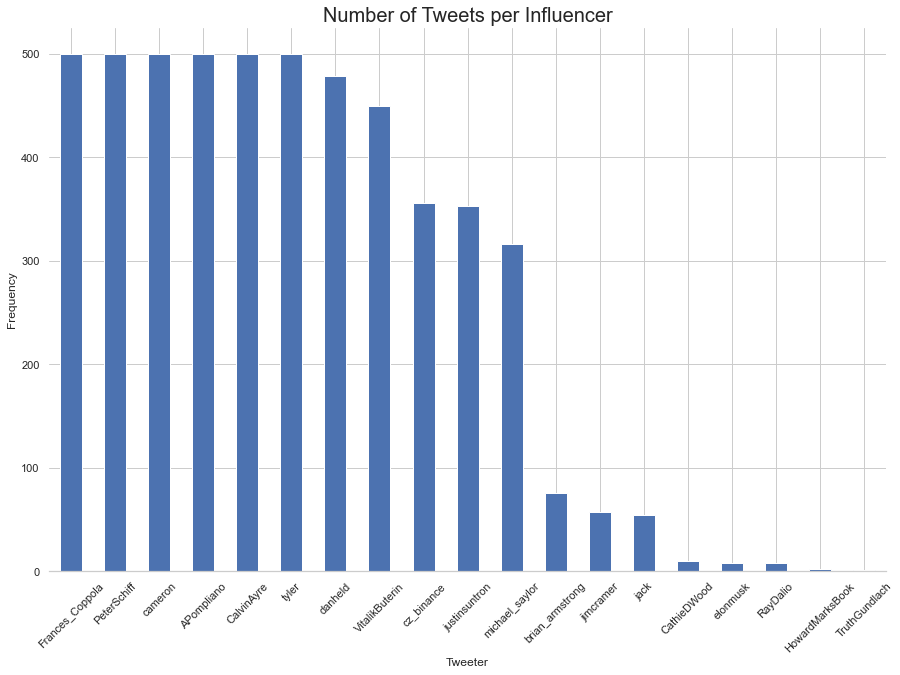

In [9]:
# plot tweets by User
sns.set_theme(style = 'whitegrid')
ax = tweets.User.value_counts().plot(kind = 'bar', figsize = (15,10))
ax.set_xlabel('Tweeter')
ax.set_ylabel('Frequency')
ax.set_title('Number of Tweets per Influencer', fontsize = 20)
sns.despine(left = True)
plt.xticks(rotation = 45) 
plt.show()

### BTC EDA

In [10]:
# load Bitcoin Data
BTC = pd.read_csv('..\\Data\\BTC-USD_5years.csv')
BTC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1873 entries, 0 to 1872
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1873 non-null   object 
 1   Open       1869 non-null   float64
 2   High       1869 non-null   float64
 3   Low        1869 non-null   float64
 4   Close      1869 non-null   float64
 5   Adj Close  1869 non-null   float64
 6   Volume     1869 non-null   float64
dtypes: float64(6), object(1)
memory usage: 102.6+ KB


In [11]:
# forward fill 4 NaN fields
BTC.fillna(method = 'ffill', inplace = True)

# format dates
BTC.Date = pd.to_datetime(BTC.Date)

display(BTC.describe())
BTC.head()

,Open,High,Low,Close,Adj Close,Volume
count,1873.000000,1873.000000,1873.000000,1873.000000,1873.000000,1.873000e+03
mean,6870.475569,7062.991258,6676.773716,6894.876838,6894.876838,1.289997e+10
std,6699.632521,6962.691624,6445.107585,6760.206587,6760.206587,1.632221e+10
min,365.072998,374.950012,354.914001,364.330994,364.330994,2.851400e+07
25%,1223.229980,1240.790039,1208.410034,1223.540039,1223.540039,4.072200e+08
50%,6490.089844,6596.100098,6396.870117,6495.000000,6495.000000,5.570753e+09
75%,9340.864258,9516.180664,9197.450195,9341.705078,9341.705078,1.996863e+10
max,48696.535156,49487.640625,47114.507813,48717.289063,48717.289063,1.233206e+11


,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-01,430.721008,436.246002,427.515015,434.334015,434.334015,36278900.0
1,2016-01-02,434.622009,436.062012,431.869995,433.437988,433.437988,30096600.0
2,2016-01-03,433.578003,433.743011,424.705994,430.010986,430.010986,39633800.0
3,2016-01-04,430.061005,434.516998,429.084015,433.091003,433.091003,38477500.0
4,2016-01-05,433.069000,434.182007,429.675995,431.959991,431.959991,34522600.0


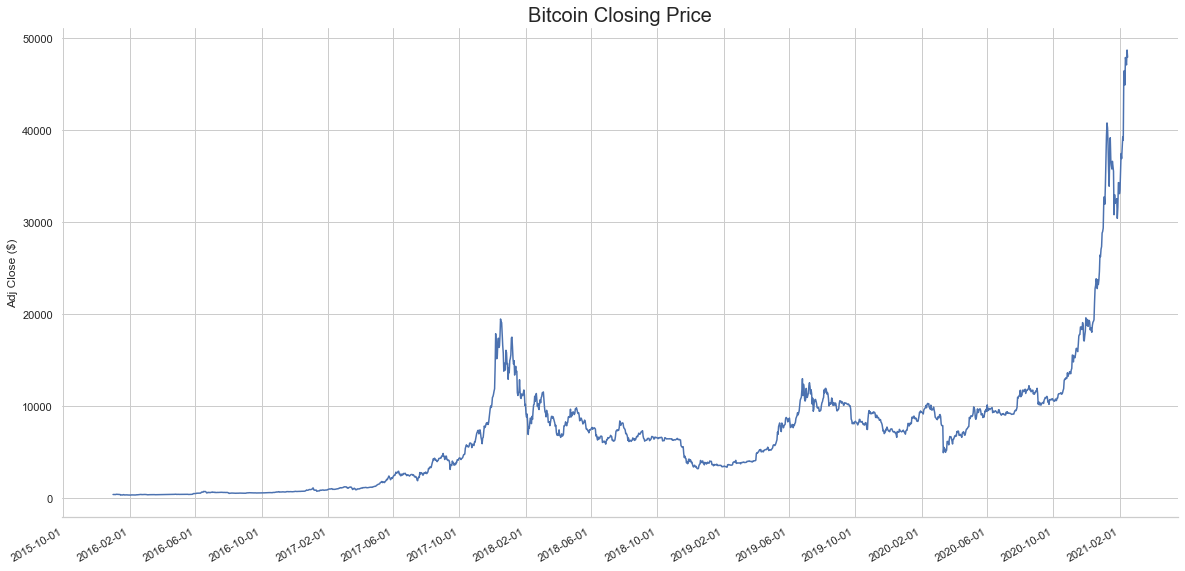

In [12]:
# BTC closing prices plot
plt.subplots(figsize = (20, 10))
ax = sns.lineplot(data = BTC, x = "Date", y = "Adj Close")
ax.set_title("Bitcoin Closing Price", fontsize = 20)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval = 4))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate() # Rotation
ax.set_xlabel(None)
ax.set_ylabel("Adj Close ($)")
sns.despine(left = True)
plt.show()

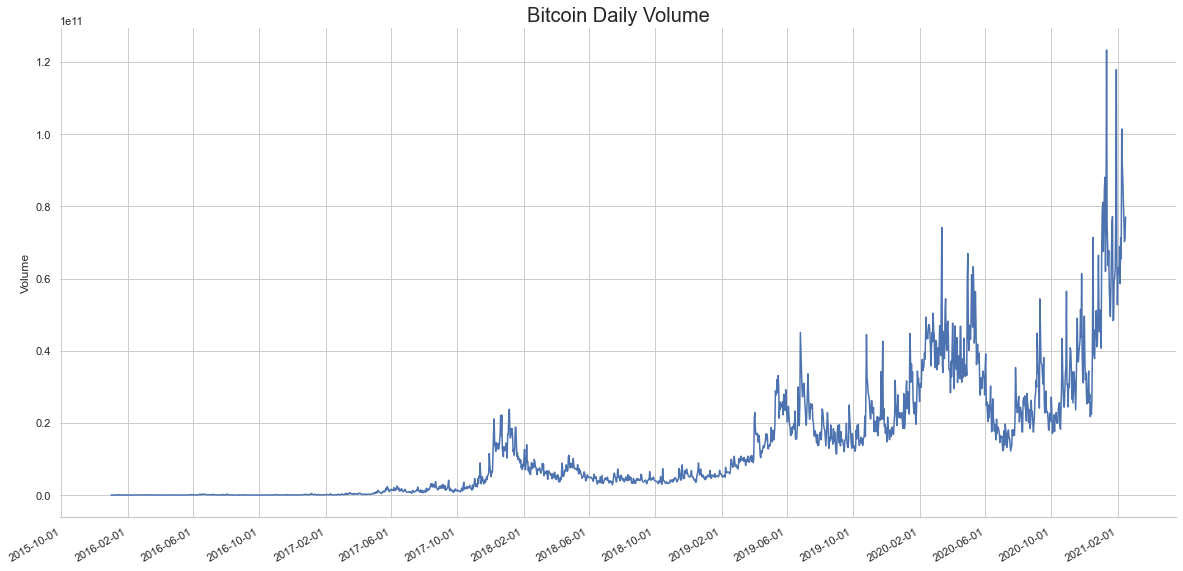

In [13]:
# BTC volume plot
plt.subplots(figsize = (20, 10))
ax = sns.lineplot(data = BTC, x = "Date", y = "Volume")
ax.set_title("Bitcoin Daily Volume", fontsize = 20)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval = 4))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate() # Rotation
ax.set_xlabel(None)
ax.set_ylabel("Volume")
sns.despine(left = True)
plt.show()

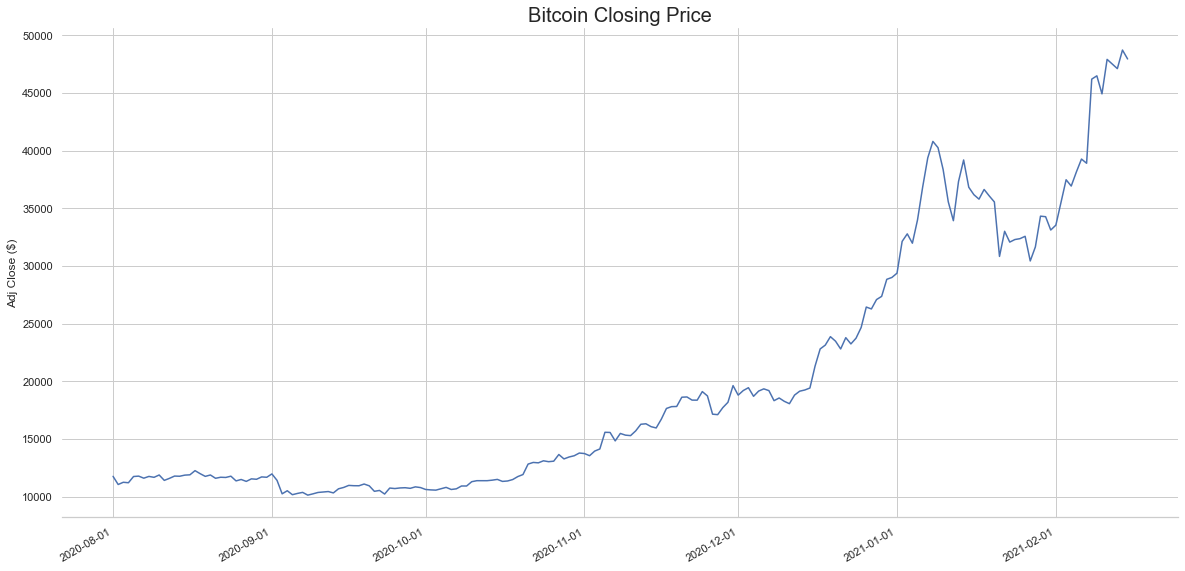

In [14]:
# BTC closing prices since AUG/1/2020
BTC_Short = BTC[BTC['Date'] >= '2020-08-01'].reset_index(drop=True)

plt.subplots(figsize = (20, 10))
ax = sns.lineplot(data = BTC_Short, x = "Date", y = "Adj Close")
ax.set_title("Bitcoin Closing Price", fontsize = 20)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate() # Rotation
ax.set_xlabel(None)
ax.set_ylabel("Adj Close ($)")
sns.despine(left = True)
plt.show()

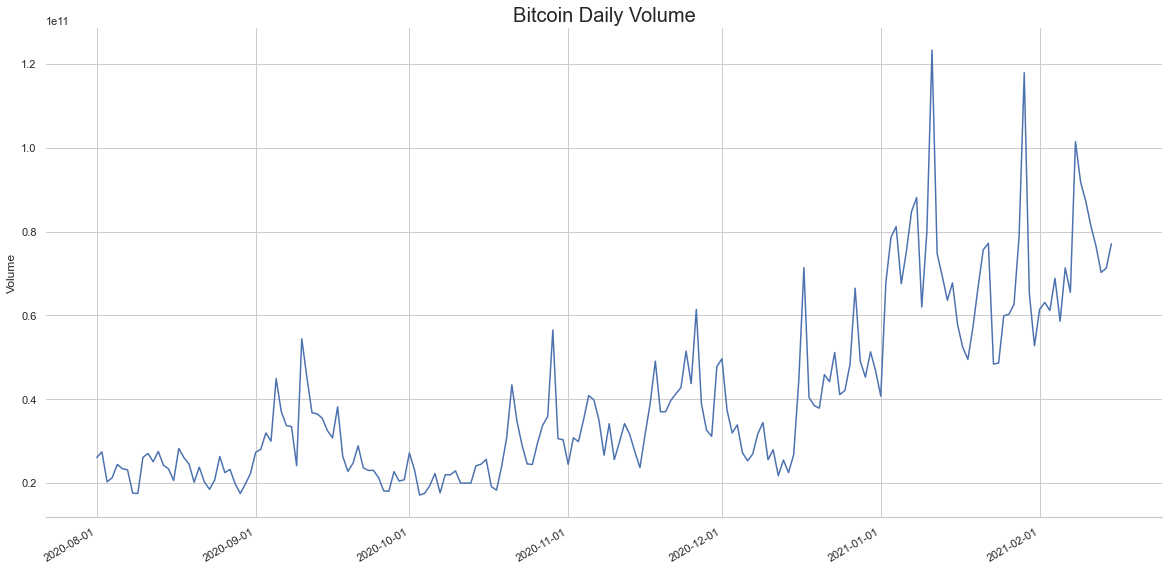

In [15]:
# BTC volume plot
plt.subplots(figsize = (20, 10))
ax = sns.lineplot(data = BTC_Short, x = "Date", y = "Volume")
ax.set_title("Bitcoin Daily Volume", fontsize = 20)
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonthday = 1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate() # Rotation
ax.set_xlabel(None)
ax.set_ylabel("Volume")
sns.despine(left = True)
plt.show()

In [16]:
BTC.to_csv('..//Data//BTC_clean.csv', index = False)
print('BTC_clean.csv has been saved')

BTC_clean.csv has been saved


### Begin Sentiment Analysis

In [17]:
# utilizing VADER
analyzer = SentimentIntensityAnalyzer()

scores = []
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
rating_list = []

for i in range(tweets.Tweet.shape[0]):
    pos = analyzer.polarity_scores(tweets.Tweet[i])["pos"]
    neu = analyzer.polarity_scores(tweets.Tweet[i])["neu"]
    neg = analyzer.polarity_scores(tweets.Tweet[i])["neg"]
    compound = analyzer.polarity_scores(tweets.Tweet[i])["compound"]
    scores.append({"Positive": pos, "Negative": neg, "Neutral": neu, "Compound": compound})
    
score = pd.DataFrame.from_dict(scores)
tweet_vader = tweets.join(score)

for i in range(tweet_vader.Tweet.shape[0]):
    if tweet_vader.Compound[i] >= 0.05: 
        rating_list.append('Positive')
    elif tweet_vader.Compound[i] <= -0.05: 
        rating_list.append('Negative')
    else: 
        rating_list.append('Neutral')
        
tweet_vader['Rating'] = rating_list
tweet_vader.head()

,User,Tweet,Date,Positive,Negative,Neutral,Compound,Rating
0,elonmusk,Any crypto wallet that won’t give you your pr...,2021-02-10,0.000,0.138,0.862,-0.3400,Negative
1,elonmusk,"Doge appears to be inflationary, but is not m...",2021-02-08,0.000,0.000,1.000,0.0000,Neutral
2,elonmusk,It’s the most fun crypto!,2021-02-07,0.493,0.000,0.507,0.5974,Positive
3,elonmusk,Dogecoin is the people’s crypto,2021-02-04,0.000,0.000,1.000,0.0000,Neutral
4,elonmusk,Bitcoin is almost as bs as fiat money,2020-12-20,0.000,0.000,1.000,0.0000,Neutral


In [18]:
tweet_vader.describe()

,Positive,Negative,Neutral,Compound
count,5168.000000,5168.000000,5168.000000,5168.000000
mean,0.106713,0.044677,0.840482,0.139611
std,0.137155,0.087571,0.170731,0.365579
min,0.000000,0.000000,0.000000,-0.959000
25%,0.000000,0.000000,0.743000,0.000000
50%,0.058500,0.000000,0.867000,0.000000
75%,0.180250,0.069000,1.000000,0.421500
max,1.000000,0.688000,1.000000,0.999800


In [19]:
# utilizing TextBlob
scores = []
ratings = []

for i in range(tweets.Tweet.shape[0]):
    analyzer = TextBlob(tweets.Tweet[i])
    scores.append(analyzer.sentiment.polarity)
    if analyzer.sentiment.polarity > 0: 
        ratings.append('Positive')
    elif analyzer.sentiment.polarity == 0: 
        ratings.append('Neutral')
    else: 
        ratings.append('Negative')
        
tweet_textblob = tweets.copy()
tweet_textblob['Score'] = scores
tweet_textblob['Rating'] = ratings
tweet_textblob.head()

,User,Tweet,Date,Score,Rating
0,elonmusk,Any crypto wallet that won’t give you your pr...,2021-02-10,0.0000,Neutral
1,elonmusk,"Doge appears to be inflationary, but is not m...",2021-02-08,-0.0500,Negative
2,elonmusk,It’s the most fun crypto!,2021-02-07,0.4375,Positive
3,elonmusk,Dogecoin is the people’s crypto,2021-02-04,0.0000,Neutral
4,elonmusk,Bitcoin is almost as bs as fiat money,2020-12-20,0.0000,Neutral


In [20]:
print('Value Counts from TextBlob')
print(tweet_textblob.Rating.value_counts())
print("")
print('Value Counts from VADER')
print(tweet_vader.Rating.value_counts())

Value Counts from TextBlob
Neutral     2247
Positive    2190
Negative     731
Name: Rating, dtype: int64

Value Counts from VADER
Positive    2287
Neutral     1942
Negative     939
Name: Rating, dtype: int64


In [21]:
tweet_vader.groupby('Rating').User.value_counts()

Rating    User           
Negative  PeterSchiff        182
          Frances_Coppola    129
          CalvinAyre          97
          VitalikButerin      86
          cameron             73
          tyler               72
          danheld             69
          APompliano          68
          cz_binance          62
          michael_saylor      43
          justinsuntron       21
          jimcramer           15
          brian_armstrong     13
          CathieDWood          3
          RayDalio             2
          elonmusk             2
          jack                 2
Neutral   CalvinAyre         223
          danheld            216
          APompliano         210
          tyler              200
          cameron            195
          Frances_Coppola    174
          VitalikButerin     171
          cz_binance         151
          PeterSchiff        129
          justinsuntron      129
          michael_saylor      77
          jack                21
          brian_a

In [22]:
tweet_textblob.groupby('Rating').User.value_counts()

Rating    User           
Negative  PeterSchiff        107
          Frances_Coppola     99
          VitalikButerin      80
          APompliano          68
          danheld             65
          tyler               59
          CalvinAyre          57
          cameron             56
          cz_binance          53
          michael_saylor      41
          justinsuntron       21
          brian_armstrong      8
          jimcramer            6
          jack                 5
          RayDalio             3
          CathieDWood          2
          elonmusk             1
Neutral   Frances_Coppola    243
          tyler              225
          danheld            219
          cameron            217
          CalvinAyre         214
          PeterSchiff        197
          APompliano         196
          justinsuntron      177
          VitalikButerin     167
          cz_binance         155
          michael_saylor     152
          jack                26
          jimcram

In [23]:
# compare Vader and TextBlob differences by reviewing Elon Musk Tweets
display(tweet_vader.loc[tweet_vader.User == 'elonmusk'])
tweet_textblob.loc[tweet_vader.User == 'elonmusk']

,User,Tweet,Date,Positive,Negative,Neutral,Compound,Rating
0,elonmusk,Any crypto wallet that won’t give you your pr...,2021-02-10,0.000,0.138,0.862,-0.3400,Negative
1,elonmusk,"Doge appears to be inflationary, but is not m...",2021-02-08,0.000,0.000,1.000,0.0000,Neutral
2,elonmusk,It’s the most fun crypto!,2021-02-07,0.493,0.000,0.507,0.5974,Positive
3,elonmusk,Dogecoin is the people’s crypto,2021-02-04,0.000,0.000,1.000,0.0000,Neutral
4,elonmusk,Bitcoin is almost as bs as fiat money,2020-12-20,0.000,0.000,1.000,0.0000,Neutral
5,elonmusk,Bitcoin is my safe word,2020-12-20,0.420,0.000,0.580,0.4404,Positive
6,elonmusk,👻 💵 \n,2020-11-17,0.000,0.535,0.465,-0.3182,Negative
7,elonmusk,🎶 Toss a bitcoin to ur Witcher 🎶,2020-11-16,0.000,0.000,1.000,0.0000,Neutral


,User,Tweet,Date,Score,Rating
0,elonmusk,Any crypto wallet that won’t give you your pr...,2021-02-10,0.0000,Neutral
1,elonmusk,"Doge appears to be inflationary, but is not m...",2021-02-08,-0.0500,Negative
2,elonmusk,It’s the most fun crypto!,2021-02-07,0.4375,Positive
3,elonmusk,Dogecoin is the people’s crypto,2021-02-04,0.0000,Neutral
4,elonmusk,Bitcoin is almost as bs as fiat money,2020-12-20,0.0000,Neutral
5,elonmusk,Bitcoin is my safe word,2020-12-20,0.5000,Positive
6,elonmusk,👻 💵 \n,2020-11-17,0.0000,Neutral
7,elonmusk,🎶 Toss a bitcoin to ur Witcher 🎶,2020-11-16,0.0000,Neutral


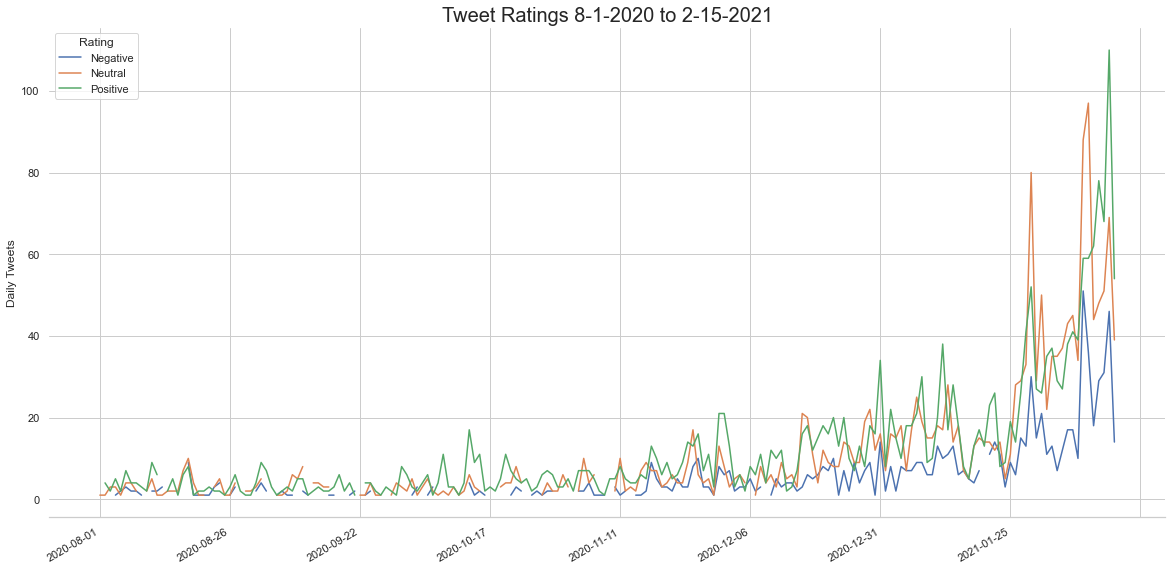

In [24]:
# plot Tweets with VADER ratings
df = tweet_vader.groupby('Date').Rating.value_counts().unstack()
ax = df.plot(figsize = (20, 10))
ax.set_title('Tweet Ratings 8-1-2020 to 2-15-2021', fontsize = 20)
plt.gcf().autofmt_xdate() # Rotation
ax.set_xlabel(None)
ax.set_ylabel("Daily Tweets")
sns.despine(left = True)
plt.show()